# Example for Numpy and Pillow usage
with data from https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [1]:
from PIL import Image

In [2]:
import numpy as np
im = Image.open("Vd-Orig.png")
im2 = Image.open("Vd-Orig.png")

conv_kernel = np.array([
    [ 0, 1, 0],
    [ 1,-4, 1],
    [ 0, 1, 0],
])

for x in range(1, im.size[0]-1):
    for y in range(1, im.size[1]-1):
        # Transpose from         [x, y, rgb]
        #           to   rgb_x_y:[rgb, x, y]
        rgb_x_y = np.transpose([
            [im.getpixel((x-1,y-1)), im.getpixel((x,y-1)), im.getpixel((x+1,y-1))],
            [im.getpixel((x-1,y  )), im.getpixel((x,y  )), im.getpixel((x+1,y  ))],
            [im.getpixel((x-1,y+1)), im.getpixel((x,y+1)), im.getpixel((x+1,y+1))]
        ], (2,0,1))
        # Multiply rgb_x_y:[rgb, x, y] * [x, y] becomes new [rgb, x, y]
        im2.putpixel((x,y),tuple(np.sum(rgb_x_y * conv_kernel, axis=(1,2)).clip(min=0)))


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

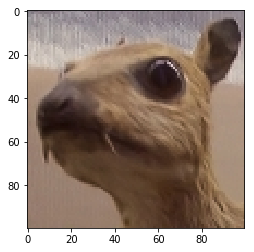

In [5]:
plt.imshow(im)

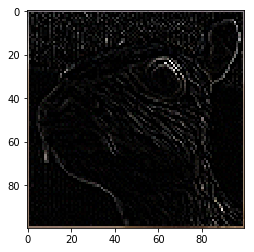

In [6]:
plt.imshow(im2)